In [2]:
# libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import json

# settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
# getting terrorism data ready
terror = pd.read_csv('data/globalterrorismdb_0617dist.csv',encoding='ISO-8859-1')

In [3]:
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','city':'City','latitude':'Latitude','longitude':'Longitude','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','City','Latitude','Longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['Casualties']=terror['Killed']+terror['Wounded']

In [4]:
# add country code for each record
name_map = {
    "Venezuela": "VEN",
    "West Germany (FRG)": "DEU",
    "East Germany (GDR)": "DEU",
    "Iran": "IRN",
    "Bolivia": "BOL",
    "South Yemen": "YEM",
    "North Yemen": "YEM",
    "Democratic Republic of the Congo": "COD",
    "People's Republic of the Congo": "COD",
    "Syria": "SYR",
    "Russia": "RUS",
    "South Korea": "KOR",
    "Rhodesia": "ZWE",
    "Taiwan": "TWN",
    "Tanzania": "TZA"
}

mapping = {country.name: country.alpha_3 for country in pycountry.countries}

def get_cc(name):
    if name in name_map:
        return name_map[name]
    return mapping.get(name, None)


terror['CountryCode'] = terror['Country'].apply(lambda country: get_cc(country))
terror.head(3)

,Year,Month,Day,Country,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties,CountryCode
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0,DOM
1,1970,0,0,Mexico,North America,Mexico city,19.432608,-99.133207,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0,MEX
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0,PHL


In [5]:
terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
City              446
Latitude         4606
Longitude        4606
AttackType          0
Killed           9682
Wounded         15325
Target            634
Summary         66138
Group               0
Target_type         0
Weapon_type         0
Motive         121764
Casualties      15826
CountryCode      3210
dtype: int64

In [6]:
# show where no country code was found
terror[terror['CountryCode'].isnull()][['Country', 'CountryCode']]

,Country,CountryCode
1139,West Bank and Gaza Strip,None
1151,Czechoslovakia,None
1341,South Vietnam,None
1897,Yugoslavia,None
1954,Zaire,None
2384,Yugoslavia,None
3686,West Bank and Gaza Strip,None
4606,Zaire,None
4848,Yugoslavia,None
5694,Soviet Union,None


In [7]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1500.0 that took place in Iraq


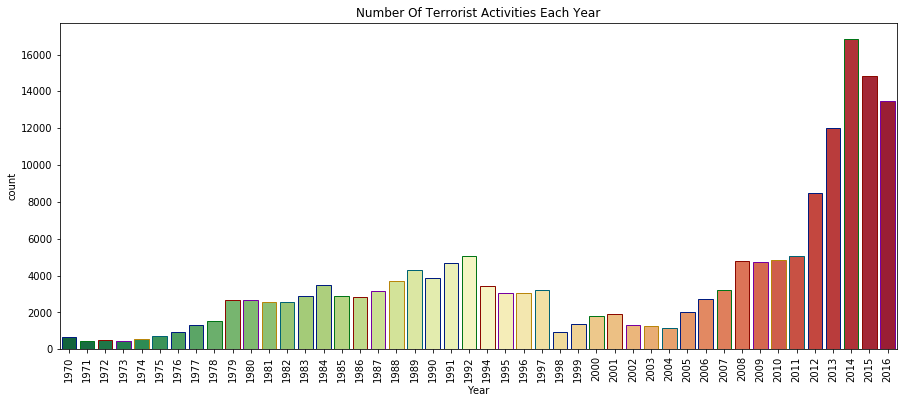

In [8]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

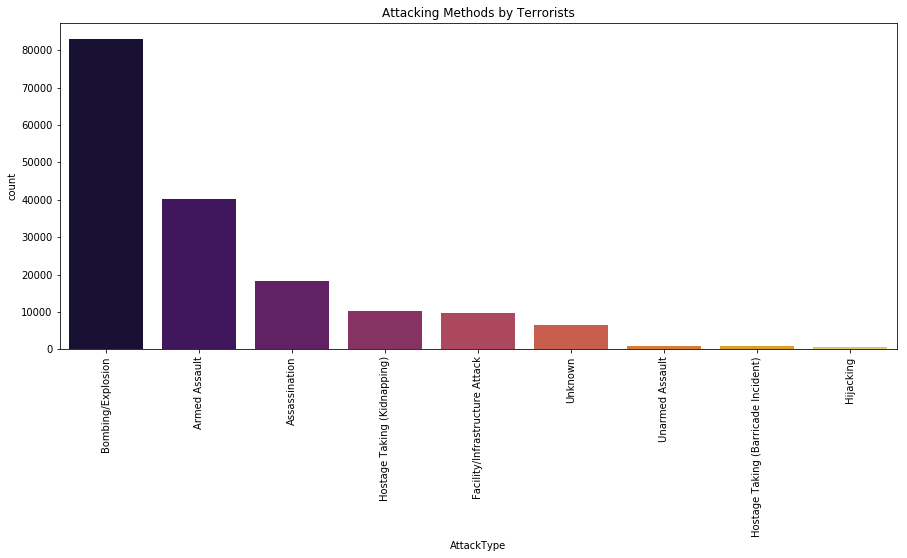

In [9]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

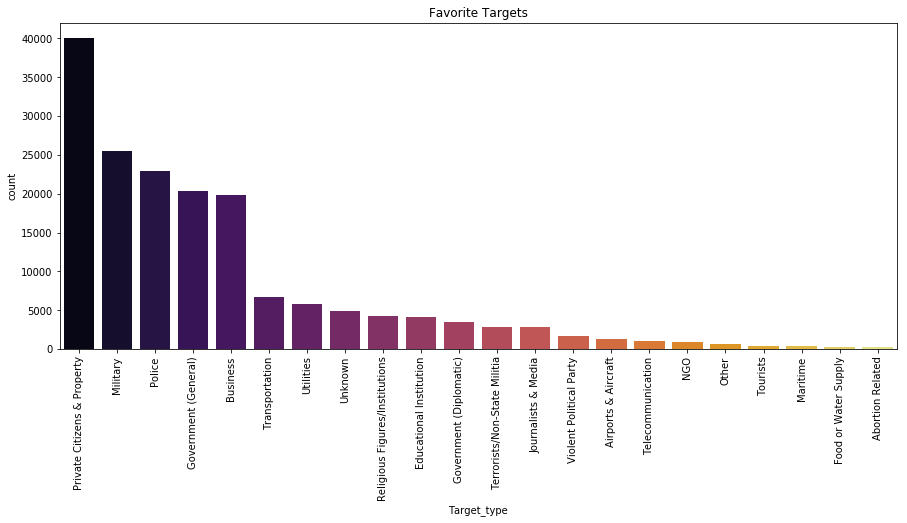

In [10]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

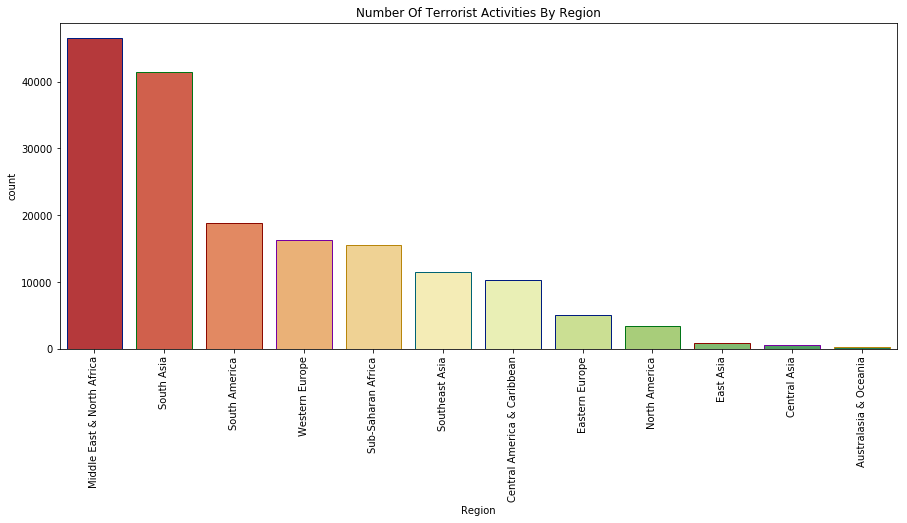

In [11]:
# Terrorism By Region
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',edgecolor=sns.color_palette('dark',7),order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

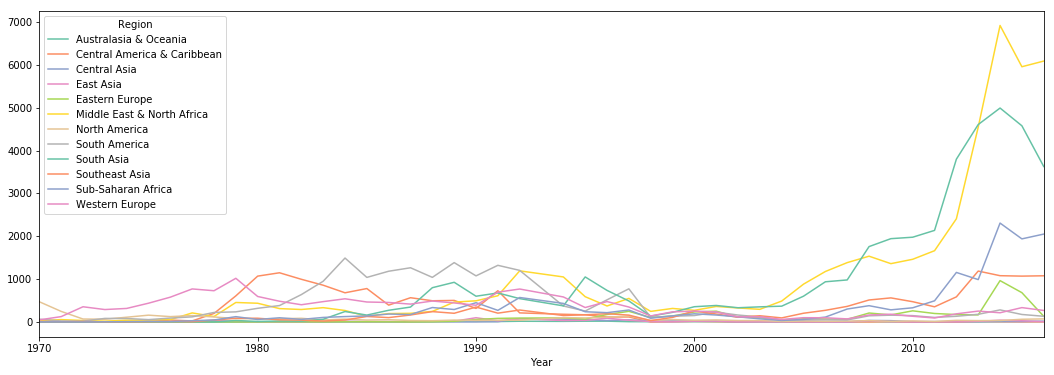

In [12]:
# Trend in Terrorist Activities
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

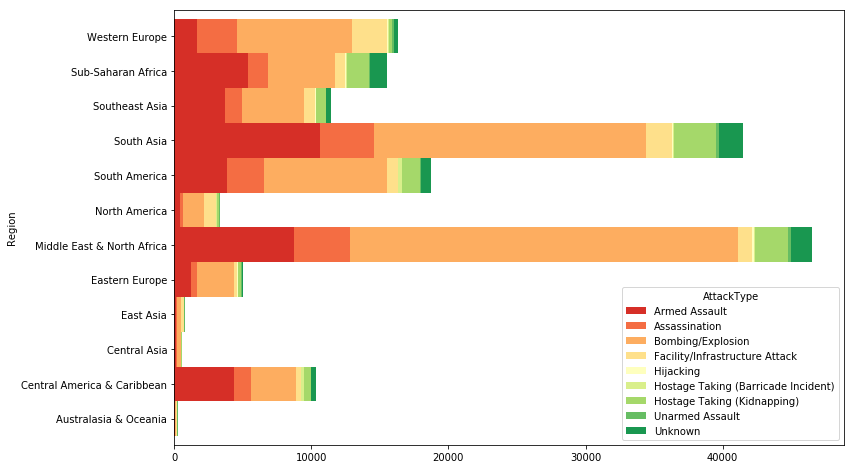

In [13]:
# AttackType vs Region
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [14]:
# export to csv
terror.to_json('data/terror.json', orient='records')

In [15]:
terror.head(1000).to_json('data/terror-test.json', orient='records')

In [21]:
terror_min = terror[['Year', 'Killed', 'CountryCode']]
terror_min.to_json('data/terror-min.json', orient='records')

## Migrations Processing

In [136]:
import pandas as pd
import json
from collections import defaultdict

MIGRATION_THRESHOLD = 1000 #500000

countries = {}
migrations = {'1990': {}, '1995': {}, '2000': {}, '2005': {}, '2010': {}, '2015': {}, '2017': {}}

citiesDF = pd.read_csv("data/cities.csv")
migrationsDF = pd.read_csv("data/unprocessedMigrations.csv")

# migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Ethiopia']


# renaming columns
migrationsDF.rename(columns={'Russian Federation': 'Russia'}, inplace=True)

migrationsDF.head(20)


,Unnamed: 0,Year,Sort order,"Major area, region, country or area of destination",Notes,Code,Type of data (a),Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean Netherlands,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Curaçao,Cyprus,Czechia,Dem. People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faeroe Islands,Falkland Islands (Malvinas),Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Micronesia (Fed. States of),Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,TFYR Macedonia,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
0,0,1990,1990001,WORLD,NaN,900,NaN,152542373,2144536,6342531,6724681,179490,906030,2041,3792,809942,2047,21747,430322,899683,10597,303406,505818,1634120,25172,12767,5451546,84917,1769029,365414,36114,233642,71703,28366,224687,863399,26037,500149,3094,26323,617155,1018868,337199,91681,354608,115311,997144,4325,373,46240,336916,18727,489955,4229860,551080,95648,1009148,40076,91302,17488,69724,370866,426201,835546,41878,174364,277514,38574,401962,202194,5281,42366,465022,213731,1321128,1241877,34972,170617,113928,1687517,7524,260,90156,250690,1197097,2848,3149,15208,36149,920441,3277677,373303,11994,1041455,9510,43250,5828,1376,343623,352590,55320,233660,527307,32,156553,386934,17635,6718862,1636326,629834,1506679,917639,10735,278956,3416421,588820,609032,313737,2972433,242119,4053,81482,522615,482094,215165,506600,191993,516719,76071,3430,341083,27828,58633,121365,562617,2192,647744,110735,1428,11041,134129,108385,1835,4394684,7714,4407,24155,78678,7188,1588218,2218009,685288,16057,1412,748046,728810,4151,388089,442037,132726,448460,5860,2525,138537,12534,3341574,2958,134703,3015,297925,313595,2029190,1533306,1880727,1200835,12204,1624797,625810,3087,813087,12664537,550719,884,20714,22006,485,37043,74861,1415,13941

In [140]:
# migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russian Federation']
migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russian Federation'] = migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russian Federation'].replace('Russian Federation', 'Russia')


In [142]:
# migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russian Federation'] = 'Russia'
migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russia']

,Unnamed: 0,Year,Sort order,"Major area, region, country or area of destination",Notes,Code,Type of data (a),Total,Other North,Other South,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bermuda,Bhutan,Bolivia (Plurinational State of),Bosnia and Herzegovina,Botswana,Brazil,British Virgin Islands,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Caribbean Netherlands,Cayman Islands,Central African Republic,Chad,Channel Islands,Chile,China,"China, Hong Kong SAR","China, Macao SAR",Colombia,Comoros,Congo,Cook Islands,Costa Rica,Côte d'Ivoire,Croatia,Cuba,Curaçao,Cyprus,Czechia,Dem. People's Republic of Korea,Democratic Republic of the Congo,Denmark,Djibouti,Dominica,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Eritrea,Estonia,Ethiopia,Faeroe Islands,Falkland Islands (Malvinas),Fiji,Finland,France,French Guiana,French Polynesia,Gabon,Gambia,Georgia,Germany,Ghana,Gibraltar,Greece,Greenland,Grenada,Guadeloupe,Guam,Guatemala,Guinea,Guinea-Bissau,Guyana,Haiti,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran (Islamic Republic of),Iraq,Ireland,Isle of Man,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,Kiribati,Kuwait,Kyrgyzstan,Lao People's Democratic Republic,Latvia,Lebanon,Lesotho,Liberia,Libya,Liechtenstein,Lithuania,Luxembourg,Madagascar,Malawi,Malaysia,Maldives,Mali,Malta,Marshall Islands,Martinique,Mauritania,Mauritius,Mayotte,Mexico,Micronesia (Fed. States of),Monaco,Mongolia,Montenegro,Montserrat,Morocco,Mozambique,Myanmar,Namibia,Nauru,Nepal,Netherlands,New Caledonia,New Zealand,Nicaragua,Niger,Nigeria,Niue,Northern Mariana Islands,Norway,Oman,Pakistan,Palau,Panama,Papua New Guinea,Paraguay,Peru,Philippines,Poland,Portugal,Puerto Rico,Qatar,Republic of Korea,Republic of Moldova,Réunion,Romania,Russia,Rwanda,Saint Helena,Saint Kitts and Nevis,Saint Lucia,Saint Pierre and Miquelon,Saint Vincent and the Grenadines,Samoa,San Marino,Sao Tome and Principe,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Sint Maarten (Dutch part),Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,State of Palestine,Sudan,Suriname,Swaziland,Sweden,Switzerland,Syrian Arab Republic,Tajikistan,TFYR Macedonia,Thailand,Timor-Leste,Togo,Tokelau,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Turks and Caicos Islands,Tuvalu,Uganda,Ukraine,United Arab Emirates,United Kingdom,United Republic of Tanzania,United States of America,United States Virgin Islands,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
140,140,1990,1990141,Russia,NaN,643,B,11524948,1428,7222,19103,1026,1303,959,..,519,304,..,582,535266,..,761,3776,936852,..,..,1280,..,809353,859,..,317,..,..,392,876,194,577,..,..,10760,525,171,52,227,738,394,..,..,131,161,..,638,67405,38,..,336,17,492,..,35,113,365,2689,..,479,13710,9699,..,2445,..,..,..,336,1499,..,29,..,62441,438,..,..,..,1737,1474,..,..,..,..,656888,144895,286,..,1997,..,..,..,..,..,429,342,..,..,..,..,18236,54,9801,377,3096,1424,194,..,2842,1020,..,655,1555,2349697,394,..,248,433625,100,95730,2133,..,..,373,..,82889,92,144,12,557,135,196,575,..,..,..,273,..,173,..,192,21142,538,..,1755,111,411,106,..,573,371,..,196,71,27,1165,..,254,1134,61,1683,..,81,..,104,784,190,31333,129,..,115,2014,292807,..,3936,..,177,..,..,..,..,..,..,31,..,317,108,..,..,..,60,..,1020,138,..,129,246,..,840,1020,1808,588,..,..,340,407,5464,424727,359,75,..,..,..,..,..,607,13032,165923,..,29,100,3301922,283,899,269,3077,..,479,890893,..,371,32251,..,111,986,354,265
410,410,1995,1995141,Russia,NaN,643,B,11928927,1466,7322,15576,988,1189,1012,..,470,300,..,572,516425,..,743,3905,905728,..,..,1035,..,886234,857,..,324,..,..,368,776,195,594,..,..,9934,568,164,50,190,624,396,..,..,132,139,..,662,64969,36,..,297,15,424,..,

In [143]:
rus1 = migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russia']
# rus2 = migrationsDF[migrationsDF['Major area, region, country or area of destination'] == 'Russian Federation']

rus1.shape
# rus2.shape

(7, 242)

In [144]:
for key, row in citiesDF.iterrows():
    country = row['country']
    city = row['city']
    lat = row['lat']
    lng = row['lng']

    coords = {}

    coords['country'] = country
    coords['city'] = city
    coords['latitude'] = lat
    coords['longitude'] = lng

    countries[country] = coords
# countries

{'Afghanistan': {'city': 'Kabul',
  'country': 'Afghanistan',
  'latitude': 34.51669029,
  'longitude': 69.18326005},
 'Aland': {'city': 'Mariehamn',
  'country': 'Aland',
  'latitude': 60.09699618,
  'longitude': 19.94900447},
 'Albania': {'city': 'Tirana',
  'country': 'Albania',
  'latitude': 41.32754071,
  'longitude': 19.81888301},
 'Algeria': {'city': 'Algiers',
  'country': 'Algeria',
  'latitude': 36.763064799999995,
  'longitude': 3.05055253},
 'American Samoa': {'city': 'Pago Pago',
  'country': 'American Samoa',
  'latitude': -14.2766105,
  'longitude': -170.70664509999997},
 'Andorra': {'city': 'Andorra',
  'country': 'Andorra',
  'latitude': 42.50000144,
  'longitude': 1.5164859609999999},
 'Angola': {'city': 'Luanda',
  'country': 'Angola',
  'latitude': -8.838286114,
  'longitude': 13.23442704},
 'Antarctica': {'city': 'Showa Station',
  'country': 'Antarctica',
  'latitude': -69.03039249,
  'longitude': 39.7460831},
 'Antigua and Barbuda': {'city': "Saint John's",
  'co

In [145]:
c = 0
for key, row in migrationsDF.iterrows():
    country = row['Major area, region, country or area of destination']
    year = row['Year']
    
    if country in countries:
        for origin, migrants in row.items():
            if origin in countries and country != origin and migrants.isdigit() and int(migrants) > MIGRATION_THRESHOLD:
                migration = {}
                
                migration['origin'] = countries[origin]
                migration['destination'] = countries[country]
                migration['migrants'] = migrants
                
                ###### 
                c+=1
#                 print('Country/destination: ', country)
#                 print('Origin: ', origin)
#                 print('Migrants: ', migrants)
    
                if not country in migrations[str(year)]:
                    migrations[str(year)][country] = []
                
                migrations[str(year)][country].append(migration) 
    
#     if c > 10:
#         break
    
    
    


In [117]:
migrations

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [146]:
with open('data/migrations3.json', 'w') as fp:
    json.dump(migrations, fp)